<a href="https://colab.research.google.com/github/sandeeptuluri/Projects/blob/main/CNN_Real_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
data = '/content/drive/MyDrive/Data sets/real images'

In [ ]:
os.listdir(data)

['test', 'train']

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from matplotlib.image import imread

In [ ]:
test_path = data+'/test/'

In [ ]:
train_path = data+'/train/'

In [ ]:
test_path

'/content/drive/MyDrive/Data sets/real images/test/'

In [ ]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [ ]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [ ]:
os.listdir(train_path+'parasitized')[0]

'C99P60ThinF_IMG_20150918_141351_cell_141.png'

In [ ]:
para_cell = train_path+'/parasitized/'+'C99P60ThinF_IMG_20150918_141351_cell_141.png'

In [ ]:
para_cell

'/content/drive/MyDrive/Data sets/real images/train//parasitized/C99P60ThinF_IMG_20150918_141351_cell_141.png'

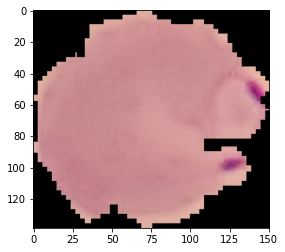

In [ ]:
plt.imshow(imread(para_cell))

In [ ]:
os.listdir(train_path+'uninfected')[0]

'C90P51ThinF_IMG_20150821_115056_cell_199.png'

In [ ]:
uninfected_cell = (train_path+'/uninfected/'+'C90P51ThinF_IMG_20150821_115056_cell_199.png')

In [ ]:
uninfected_cell

'/content/drive/MyDrive/Data sets/real images/train//uninfected/C90P51ThinF_IMG_20150821_115056_cell_199.png'

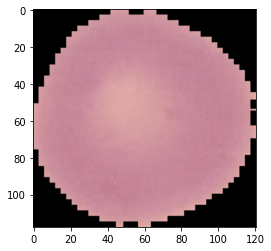

In [ ]:
plt.imshow(imread(uninfected_cell))

In [ ]:
pwd

'/content'

In [ ]:
len(os.listdir(train_path+'parasitized'))

12480

In [ ]:
len(os.listdir(train_path+'uninfected'))

12489

In [ ]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):

  img = imread(test_path+'uninfected/'+image_filename)
  d1,d2,colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


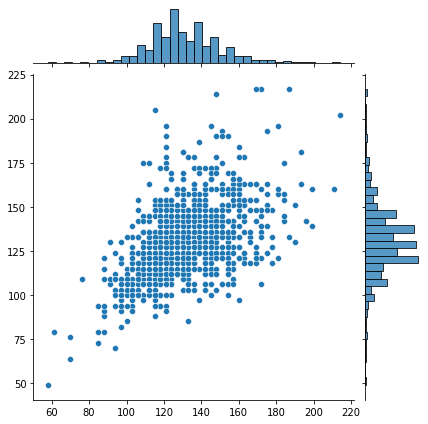

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
np.mean(dim1)

130.92538461538462

In [ ]:
np.mean(dim2)

130.75

In [ ]:
my_image = (130,130,3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#help(ImageDataGenerator)

In [ ]:
imread(para_cell).max()

0.9411765

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

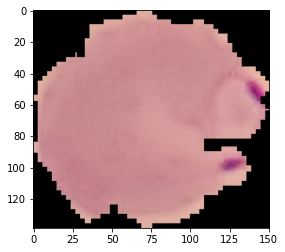

In [ ]:
para_img = imread(para_cell)
plt.imshow(para_img)

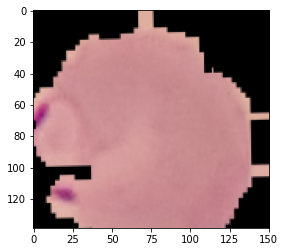

In [ ]:
plt.imshow(image_gen.random_transform(para_img))

In [ ]:
image_gen.flow_from_directory(train_path)

Found 24967 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,Flatten,Conv2D,Dense,Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=my_image,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),
                 input_shape=my_image,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),
                 input_shape=my_image,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
batch_size = 16

In [ ]:
train_img_gen = image_gen.flow_from_directory(train_path
                                                ,target_size=my_image[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24967 images belonging to 2 classes.


In [ ]:
test_img_gen = image_gen.flow_from_directory(test_path
                                                ,target_size=my_image[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 2600 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
model.fit_generator(train_img_gen,epochs=20,
                              validation_data=test_img_gen,
                              callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
  13/1561 [..............................] - ETA: 1:36:21 - loss: 73.0337 - accuracy: 0.5156

KeyboardInterrupt: ignored

In [ ]:
model.evaluate_generator(test_img_gen)

In [ ]:
model.metrics_names

In [ ]:
pred = model.predict_generator(test_img_gen)

In [ ]:
predictions = pred>0.5

In [ ]:
predictions

In [ ]:
len(pred)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
classification_report(train_image_gen,pred)

In [ ]:
confusion_matrix(train_img_gen,pred)

In [ ]:
para_cell

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
image = image.load_img(para_Cell,target_size=my_image)

In [ ]:
image

In [ ]:
model.summary

In [ ]:
model.history.history 

In [ ]:
image_arr = image.img_to_array(my_image)

In [ ]:
image_arr

In [ ]:
image_arr.shape

In [ ]:
image_arr = np.expand_dims(image_arr,axis=0)

In [ ]:
image_arrr.shape

In [ ]:
model.predict(image_arr)

In [ ]:
train_img_gen.class_indices